In [1]:
import os
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import random
import numpy as np
from sklearn import linear_model
from time import time
from sklearn.model_selection import train_test_split
from sklearn import svm,metrics,model_selection

In [23]:
def logistic_regression(sample_size,data_df,C_para):

    result = dict()
    result_time = dict()

    sample_df = data_df.sample(sample_size)
    train, test = train_test_split(sample_df, test_size = 0.3)
    print("training:%d -  testing: %d \n"%(len(train),len(test)))


    # In[25]:

    training_data = train.data
    training_label = train.category
    testing_data = test.data
    testing_label = test.category


    # ## Fitting tf-idf model

    # In[26]:

    t0 = time()
    vectorizer = TfidfVectorizer(sublinear_tf=True, max_df=0.75,binary= False,smooth_idf = False,norm='l2')
    vectorizer.fit(training_data)
    print("tf-idf learning time:", time() - t0)
    result_time['tf_idf'] = time() - t0

    # In[27]:

    result['vectorizer'] = vectorizer


    # ## Extracting features for training and testing data

    # In[28]:

    t0 = time()
    training_matrix = vectorizer.transform(training_data)
    testing_matrix = vectorizer.transform(testing_data)
    print("feature extraction time of training and testing dataset:", time() - t0)
    result_time['feature_extraction'] = time() - t0

    # In[29]:

    print('training',training_matrix.shape)
    print('testing',testing_matrix.shape)
    shape = training_matrix.shape


    result['vector_size'] = shape[1]


    # ## Classification by Logistic Regression of Scikit Learn


    t0 = time()
    logreg = linear_model.LogisticRegression(C=C_para, multi_class=‘multinomial’)
    logreg.fit(training_matrix,training_label)
    print('Logistic Regression time:',time()-t0)
    result_time['training_classifer'] = time() - t0

    t0 = time()
    predicted_result = logreg.predict(testing_matrix)
    print("testing time:", time()-t0)
    result_time['test_classifier'] = time() - t0

    print(metrics.classification_report(testing_label, predicted_result))
    result['time_consume'] = result_time
    precision = np.mean(metrics.precision_recall_fscore_support(testing_label, predicted_result)[0])
    recall = np.mean(metrics.precision_recall_fscore_support(testing_label, predicted_result)[1])
    fscore = np.mean(metrics.precision_recall_fscore_support(testing_label, predicted_result)[2])
    result['precision'] = precision
    result['recall'] = recall
    result['fscore'] = fscore
    return result

SyntaxError: invalid character in identifier (<ipython-input-23-4d89f3a20ad9>, line 58)

In [4]:
dir_path = os.path.join(os.getcwd(), 'vnexpress')
categories = list()

data = list()
for directory in os.listdir(dir_path):
#     print(directory)
    if '.' not in directory:
        list_file_path = os.path.join(dir_path, directory)
        count = 0
        for file_name in os.listdir(list_file_path):
            data_dict = dict()
            data_dict['file_name'] = file_name
            data_dict['category'] = directory
            file_path = os.path.join(list_file_path, file_name)
            file = open(file_path,'r')
            data_dict['data'] = file.read()
            data.append(data_dict)
data_df = pd.DataFrame(data)
sample_df = data_df.sample(10000)
train, test = train_test_split(sample_df, test_size = 0.3)

In [7]:
result_list = list()
for C_para in [1e-3,1e-2,1e-1,1,1e1,1e2,1e3,1e4,1e5,1e6]:
    result = logistic_regression(10000,data_df,C_para)
    result_list.append(result)
    print(result)

training:7000 -  testing: 3000 

tf-idf learning time: 3.084650993347168
feature extraction time of training and testing dataset: 3.8517391681671143
training (7000, 56719)
testing (3000, 56719)
Logistic Regression time: 0.8967759609222412
testing time: 0.007347822189331055
             precision    recall  f1-score   support

     dulich       1.00      0.01      0.02       243
    giaitri       0.98      0.73      0.83       310
    giaoduc       0.99      0.29      0.45       274
    khoahoc       0.00      0.00      0.00       274
  kinhdoanh       0.31      0.98      0.47       242
   otoxemay       1.00      0.45      0.62       274
   phapluat       0.72      0.82      0.77       268
      sohoa       1.00      0.01      0.02       295
    thegioi       0.54      0.87      0.67       289
    thethao       0.28      1.00      0.43       283
     thoisu       0.90      0.04      0.07       248

avg / total       0.70      0.48      0.41      3000

{'vectorizer': TfidfVectorizer(ana

/Users/vunguyen/anaconda/lib/python3.5/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


tf-idf learning time: 2.3027851581573486
feature extraction time of training and testing dataset: 3.3409671783447266
training (7000, 55783)
testing (3000, 55783)
Logistic Regression time: 0.9535641670227051
testing time: 0.007877826690673828
             precision    recall  f1-score   support

     dulich       0.98      0.40      0.57       270
    giaitri       0.82      0.97      0.89       306
    giaoduc       0.96      0.68      0.80       265
    khoahoc       0.82      0.84      0.83       286
  kinhdoanh       0.68      0.93      0.78       282
   otoxemay       0.99      0.87      0.92       291
   phapluat       0.66      0.93      0.77       250
      sohoa       0.97      0.67      0.80       246
    thegioi       0.56      0.91      0.69       282
    thethao       0.96      0.98      0.97       277
     thoisu       0.86      0.49      0.62       245

avg / total       0.84      0.80      0.79      3000

{'vectorizer': TfidfVectorizer(analyzer='word', binary=False, deco

In [9]:
import math
C_alpha = [1e-3,1e-2,1e-1,1,1e1,1e2,1e3,1e4,1e5,1e6]
log_C = [math.log10(x) for x in C_alpha]

In [10]:
log_C

[-3.0, -2.0, -1.0, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0]

In [8]:
result_df = pd.DataFrame(result_list)
result_df.to_csv('c_alpha.csv')

/Users/vunguyen/anaconda/lib/python3.5/site-packages/matplotlib/cbook.py:137: MatplotlibDeprecationWarning: The set_color_cycle attribute was deprecated in version 1.5. Use set_prop_cycle instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


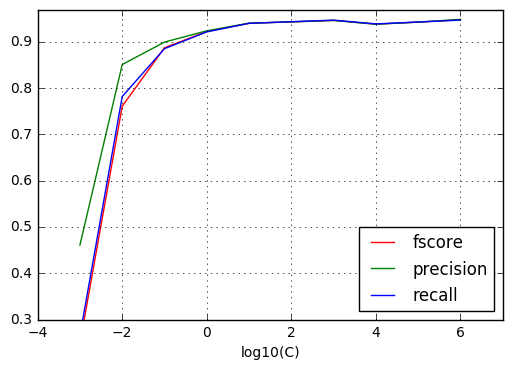

In [25]:
import matplotlib.pyplot as plt
plt.gca().set_color_cycle(['red', 'green', 'blue'])

plt.plot(log_C, result_df['fscore'])
plt.plot(log_C, result_df['precision'])
plt.plot(log_C, result_df['recall'])
plt.axis([-4, 7, 0.3, 0.97])
plt.legend(['fscore', 'precision', 'recall'], loc='lower right')
plt.xlabel('log10(C)')
plt.grid(True)
plt.show()

training:7000 -  testing: 3000 

tf-idf learning time: 3.2999649047851562
feature extraction time of training and testing dataset: 4.636116027832031
training (7000, 56503)
testing (3000, 56503)
Logistic Regression time: 0.9271719455718994
testing time: 0.007729053497314453
             precision    recall  f1-score   support

     dulich       0.00      0.00      0.00       239
    giaitri       1.00      0.24      0.38       301
    giaoduc       0.00      0.00      0.00       256
    khoahoc       0.00      0.00      0.00       297
  kinhdoanh       0.12      1.00      0.21       287
   otoxemay       1.00      0.47      0.64       251
   phapluat       1.00      0.02      0.04       289
      sohoa       0.00      0.00      0.00       242
    thegioi       0.95      0.44      0.60       286
    thethao       1.00      0.76      0.86       283
     thoisu       0.00      0.00      0.00       269

avg / total       0.48      0.27      0.25      3000

{'vectorizer': TfidfVectorizer(ana

/Users/vunguyen/anaconda/lib/python3.5/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


tf-idf learning time: 3.175947904586792
feature extraction time of training and testing dataset: 3.678441047668457
training (7000, 56621)
testing (3000, 56621)
Logistic Regression time: 1.014711856842041
testing time: 0.007853031158447266
             precision    recall  f1-score   support

     dulich       0.98      0.53      0.68       249
    giaitri       0.88      0.96      0.92       300
    giaoduc       0.92      0.82      0.87       252
    khoahoc       0.82      0.85      0.84       280
  kinhdoanh       0.63      0.94      0.76       315
   otoxemay       0.99      0.86      0.92       267
   phapluat       0.54      0.95      0.69       281
      sohoa       0.79      0.89      0.83       243
    thegioi       0.86      0.77      0.81       261
    thethao       0.96      0.99      0.97       301
     thoisu       1.00      0.04      0.08       251

avg / total       0.85      0.79      0.77      3000

{'vectorizer': TfidfVectorizer(analyzer='word', binary=False, decode_

/Users/vunguyen/anaconda/lib/python3.5/site-packages/matplotlib/cbook.py:137: MatplotlibDeprecationWarning: The set_color_cycle attribute was deprecated in version 1.5. Use set_prop_cycle instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


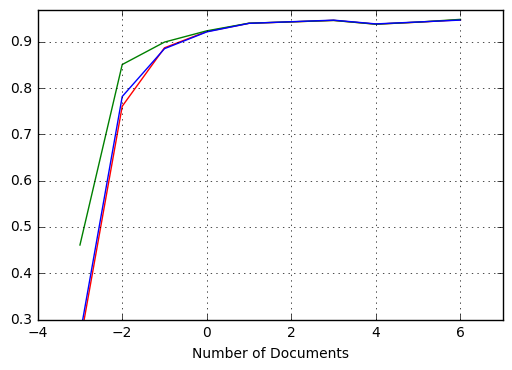

In [24]:
C_alpha = [1e-3,1e-2,1e-1,1,1e1,1e2,1e3,1e4,1e5,1e6]
result_list = list()
for C_para in C_alpha:
    result = logistic_regression(10000,data_df,C_para)
    result_list.append(result)
    print(result)

log_C = [math.log10(x) for x in C_alpha]
result_df = pd.DataFrame(result_list)
plt.gca().set_color_cycle(['red', 'green', 'blue'])

plt.plot(log_C, result_df['fscore'])
plt.plot(log_C, result_df['precision'])
plt.plot(log_C, result_df['recall'])
plt.axis([-4, 7, 0.3, 0.97])
# plt.legend(['fscore', 'precision', 'recall'], loc='lower right')
plt.xlabel('Number of Documents')
plt.grid(True)
plt.show()